In [192]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd  
import numpy as np 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [193]:
df = pd.read_csv('./Marketing_data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [195]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [196]:
df[df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [197]:
df[df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<Axes: >

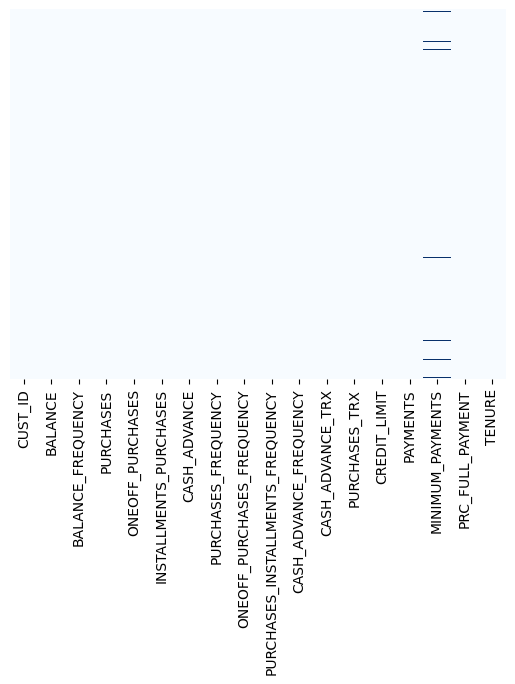

In [198]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [199]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [200]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [201]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [202]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [203]:
df.duplicated().sum()

0

In [204]:
df.drop('CUST_ID', axis=1, inplace=True)

In [205]:
n = len(df.columns)
n

17

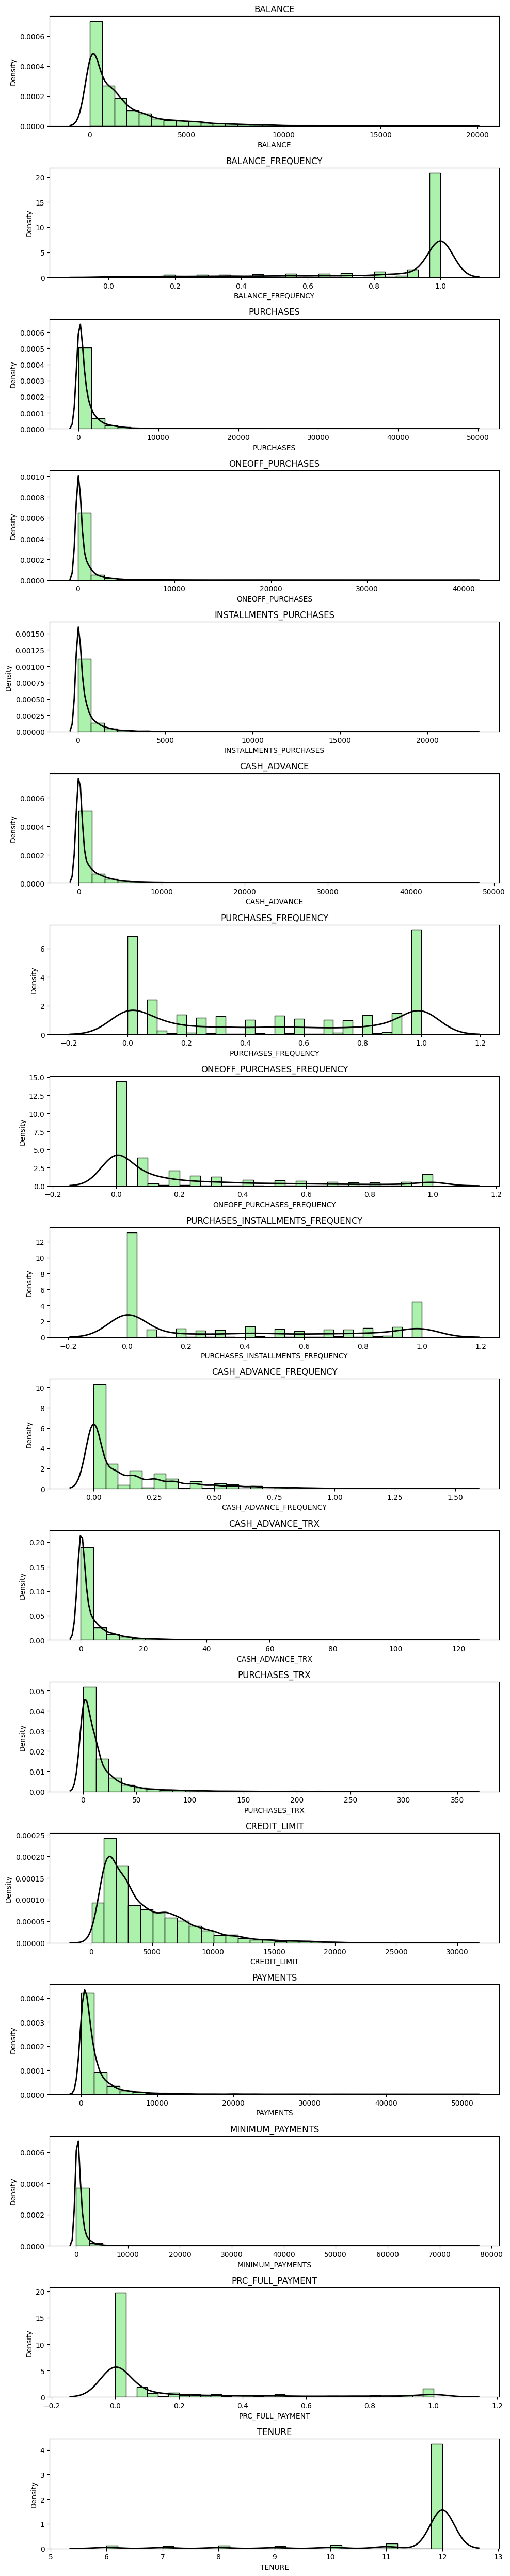

In [206]:
plt.figure(figsize=(10,50))

for i, col in enumerate(df.columns):
    plt.subplot(len(df.columns), 1, i+1)
    sns.histplot(df[col], color='lightgreen', stat='density', bins=30)
    sns.kdeplot(df[col], color='black', lw=2) 
    plt.title(col)

plt.tight_layout()
plt.show()


<Axes: >

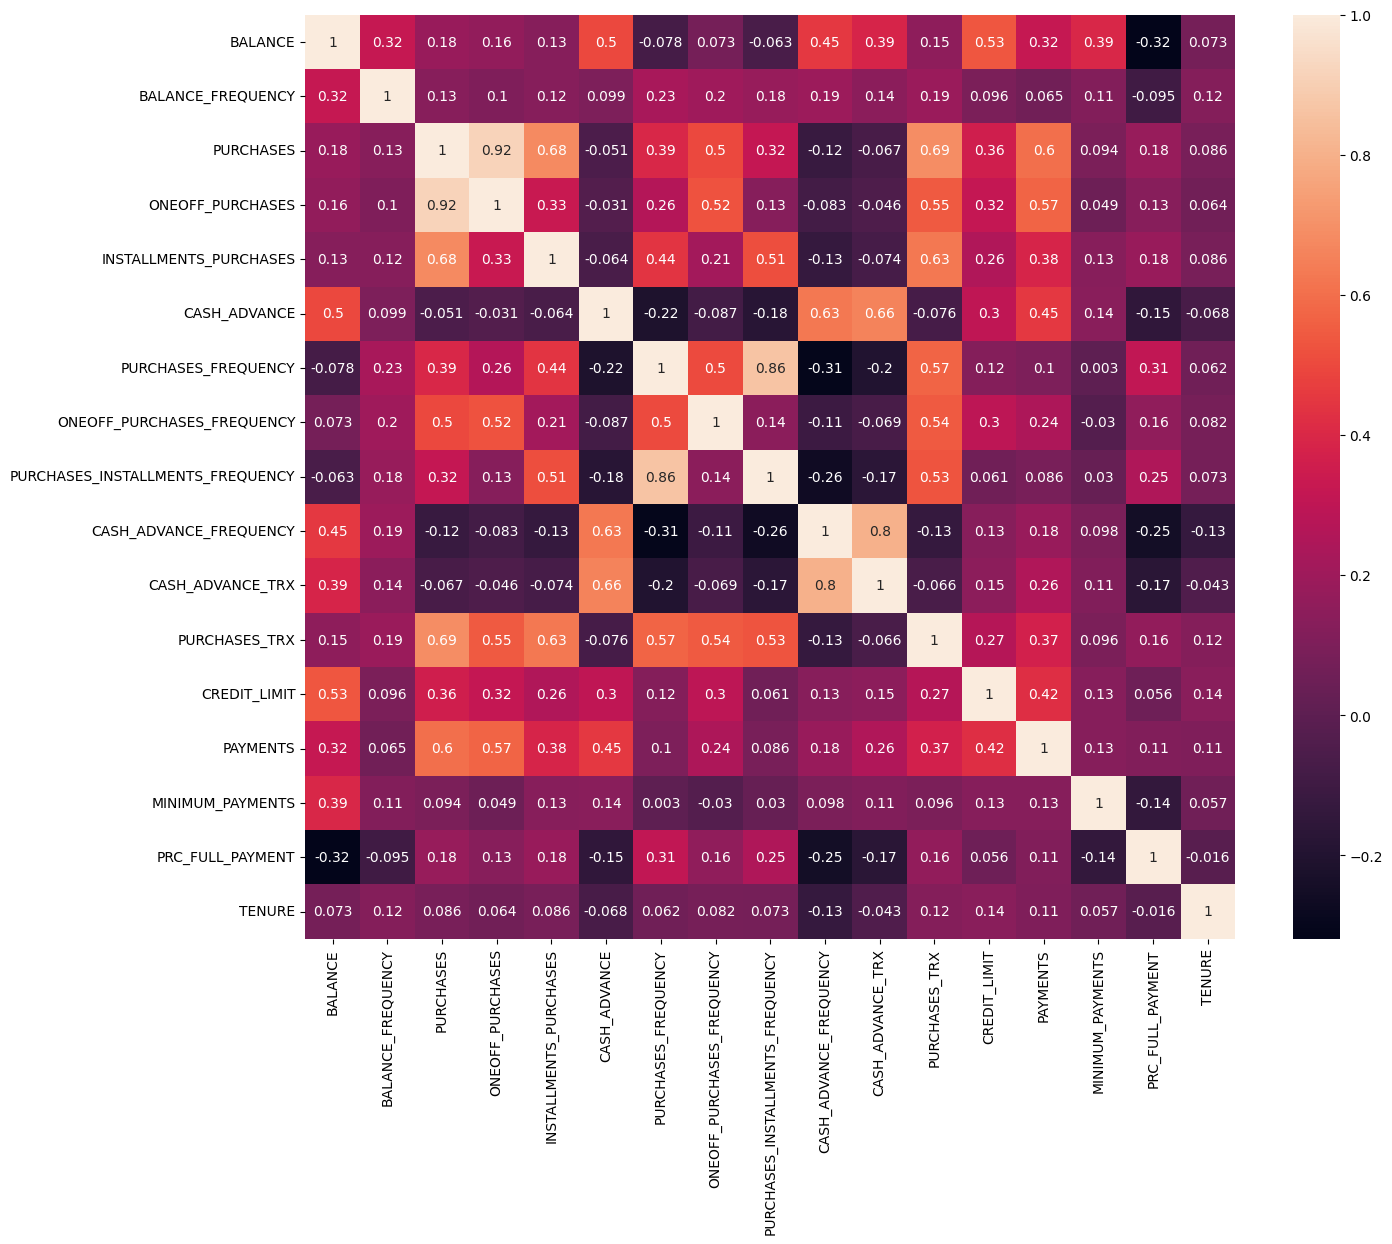

In [207]:
correlations = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlations, annot=True)

# Working on data

In [208]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [209]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [210]:
score_1 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    score_1.append(kmeans.inertia_)



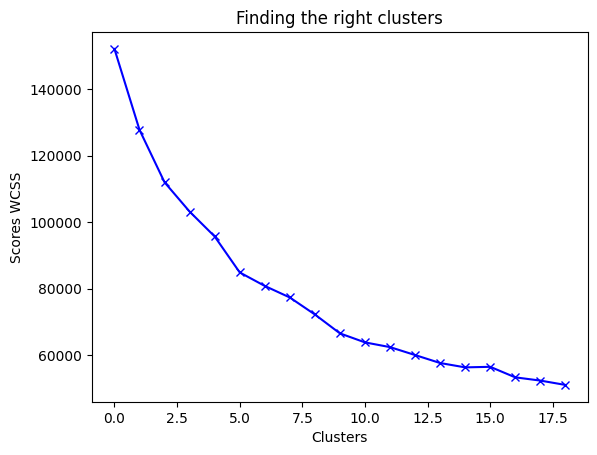

In [211]:
plt.plot(score_1, 'bx-', )
plt.title('Finding the right clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

In [212]:
kmeans = KMeans(10)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [213]:
labels

array([1, 2, 0, ..., 7, 1, 9], dtype=int32)

In [214]:
kmeans.cluster_centers_.shape

(10, 17)

In [215]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers           

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.129845,0.397378,0.561978,0.704340,0.034631,-0.325844,0.991009,1.966648,0.141491,-0.415620,-0.335881,0.628099,0.471635,0.145190,-0.160058,0.427463,0.219253
1,-0.136787,0.379007,-0.345042,-0.226745,-0.399129,-0.239937,-0.819337,-0.360948,-0.749204,-0.148484,-0.206853,-0.474181,-0.399253,-0.302874,-0.087528,-0.448775,0.142036
2,0.732664,0.309887,-0.359584,-0.253414,-0.384737,0.842697,-0.829155,-0.390434,-0.724368,1.415504,0.935407,-0.469572,0.229035,0.025152,0.107330,-0.423908,-0.433935
3,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
4,-0.202916,0.367813,-0.035551,-0.211142,0.303951,-0.305502,0.986686,-0.302815,1.181553,-0.359809,-0.294344,0.207702,-0.296803,-0.199974,-0.017090,-0.335074,0.108992
5,1.045087,0.467477,2.547070,1.873602,2.580498,-0.168264,1.163841,1.614682,1.261499,-0.289486,-0.171429,3.166420,1.305675,1.461997,0.391776,0.240645,0.336645
6,1.299171,0.455853,-0.051371,-0.271244,0.376157,-0.010364,-0.011158,-0.532469,0.230336,-0.241518,-0.060225,0.197608,0.006354,-0.092120,11.484621,-0.525551,0.300092
7,-0.707494,-0.013419,-0.055697,-0.267217,0.358716,-0.453819,0.848118,-0.435428,0.981552,-0.653499,-0.467020,0.030441,-0.201213,-0.254225,-0.295263,2.126774,-0.279532
8,2.159104,0.404200,-0.095608,-0.067122,-0.102827,3.033798,-0.225092,-0.050791,-0.177103,2.276950,2.761877,-0.092844,1.440230,1.560590,0.550632,-0.343228,0.081683
9,-0.696425,-2.234222,-0.327631,-0.238253,-0.336823,-0.301520,-0.614262,-0.440095,-0.496937,-0.475063,-0.360621,-0.440197,-0.228647,-0.223160,-0.249863,0.063150,-0.157723


In [216]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1294.214241,0.971406,2203.880546,1761.496751,442.383795,295.561539,0.888091,0.789147,0.420669,0.051974,0.956685,30.322034,6210.449409,2153.453476,491.198640,0.278740,11.810734
1,1279.764577,0.967054,266.017662,216.087053,50.139860,475.711804,0.161511,0.094780,0.066685,0.105431,1.837209,2.923467,3041.804087,856.353849,660.225911,0.022456,11.707400
2,3089.452577,0.950680,234.947278,171.822020,63.154607,2746.045439,0.157571,0.085984,0.076555,0.418401,9.632291,3.038039,5327.772228,1805.957613,1114.335614,0.029729,10.936602
3,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
4,1142.122451,0.964402,927.250530,241.984914,685.927131,338.218598,0.886355,0.112122,0.834017,0.063143,1.240148,19.872537,3414.558454,1154.237648,824.379750,0.055711,11.663177
5,3739.735207,0.988012,6445.059298,3702.233743,2744.579942,626.014051,0.957456,0.684149,0.865789,0.077215,2.078947,93.415205,9245.029240,5965.481874,1777.224358,0.224099,11.967836
6,4268.589649,0.985258,893.449189,142.227297,751.221892,957.138029,0.485872,0.043612,0.455979,0.086814,2.837838,19.621622,4517.567568,1466.465369,27628.631071,0.000000,11.918919
7,91.885458,0.874092,884.206491,148.912523,735.450315,27.190997,0.830741,0.072561,0.754531,0.004372,0.061761,15.466491,3762.355155,997.188204,176.109128,0.775760,11.143233
8,6058.468086,0.973022,798.936371,481.028329,318.082846,7340.887343,0.400010,0.187306,0.294052,0.590785,22.096606,12.402089,9734.595300,6250.899759,2147.430645,0.053326,11.626632
9,114.925909,0.348004,303.215107,196.986305,106.482695,346.570344,0.243817,0.071169,0.166942,0.040079,0.787853,3.768178,3662.539687,1087.116472,281.911381,0.172185,11.306245


In [217]:
labels.shape # Labels associated to each data point

(8950,)

In [218]:
labels.max()

9

In [219]:
labels.min()

0

In [220]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([3, 0, 2, ..., 6, 6, 6], dtype=int32)

In [221]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


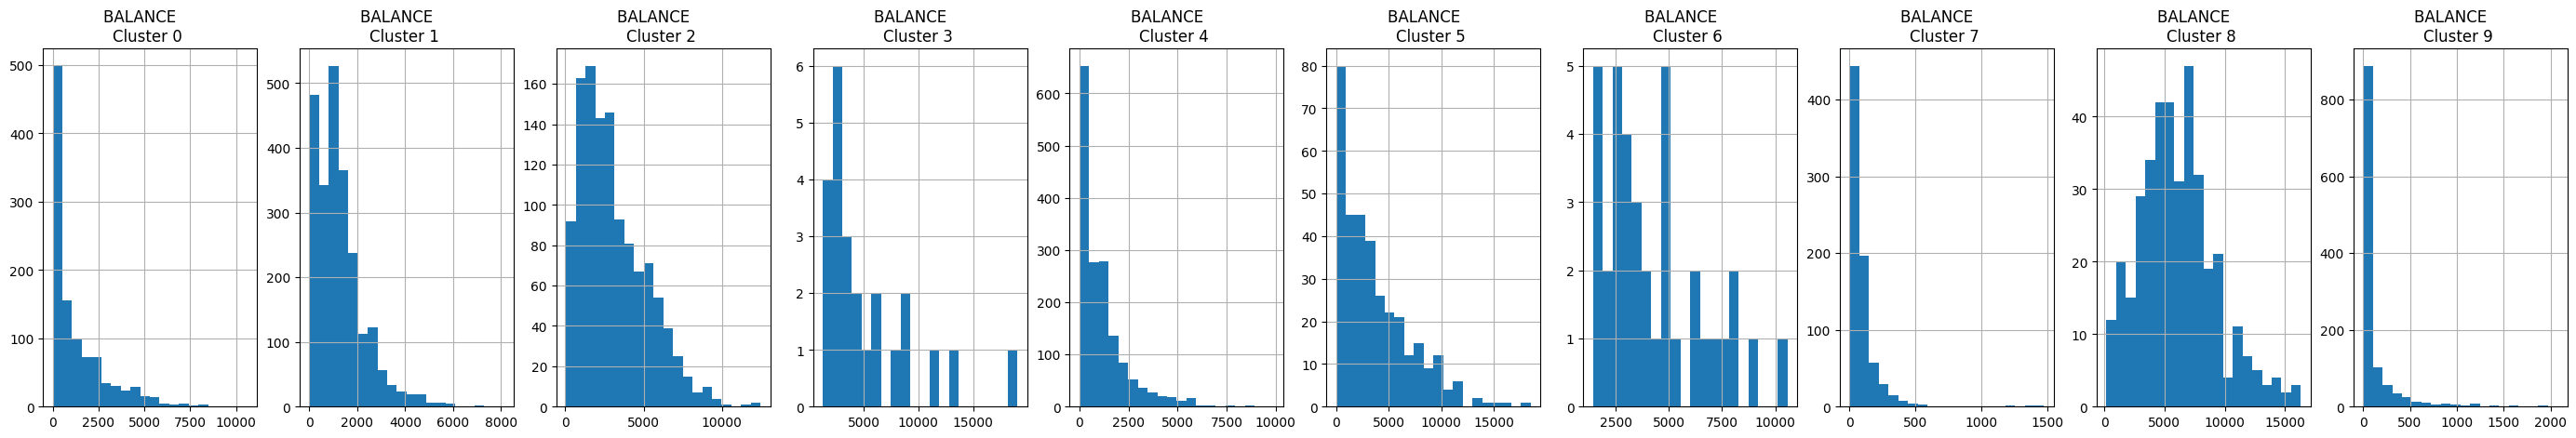

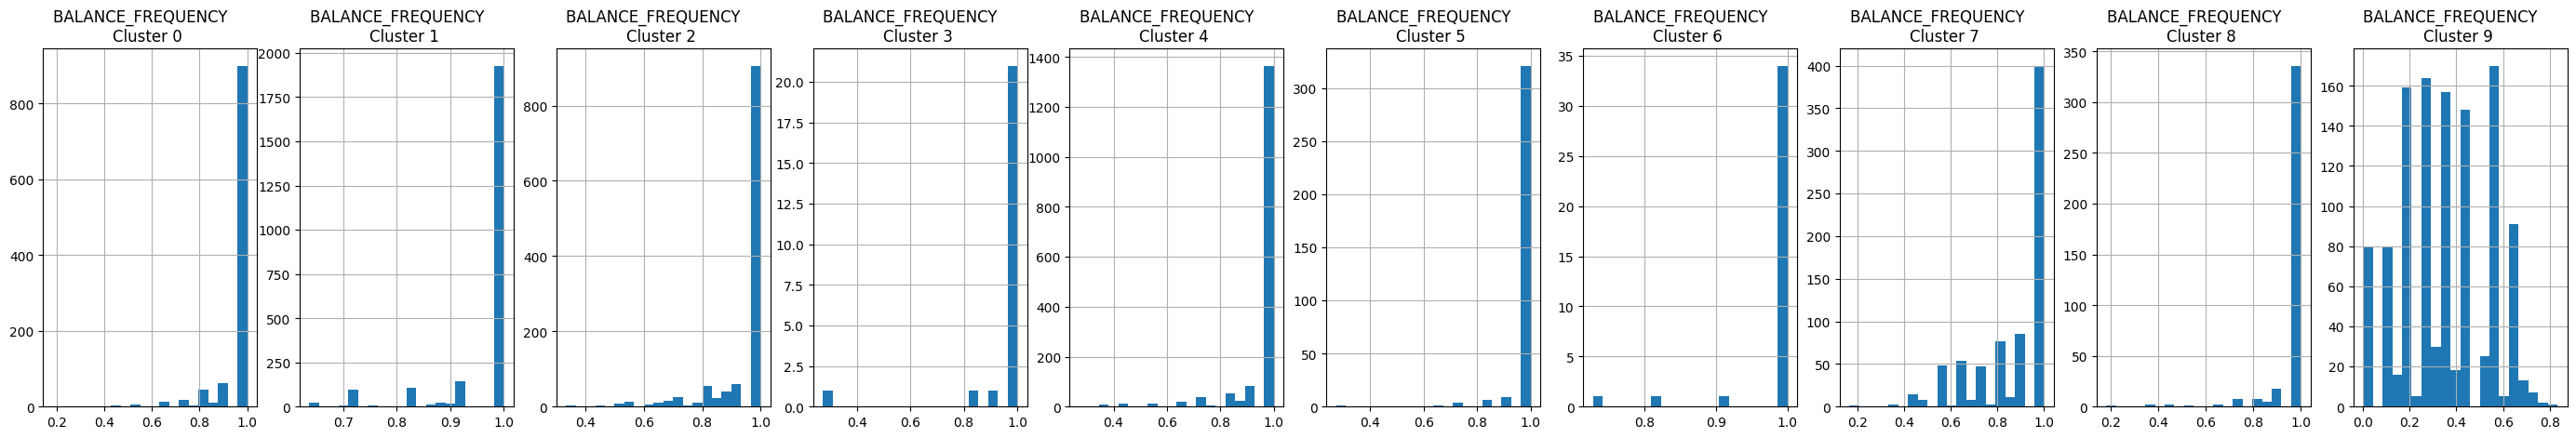

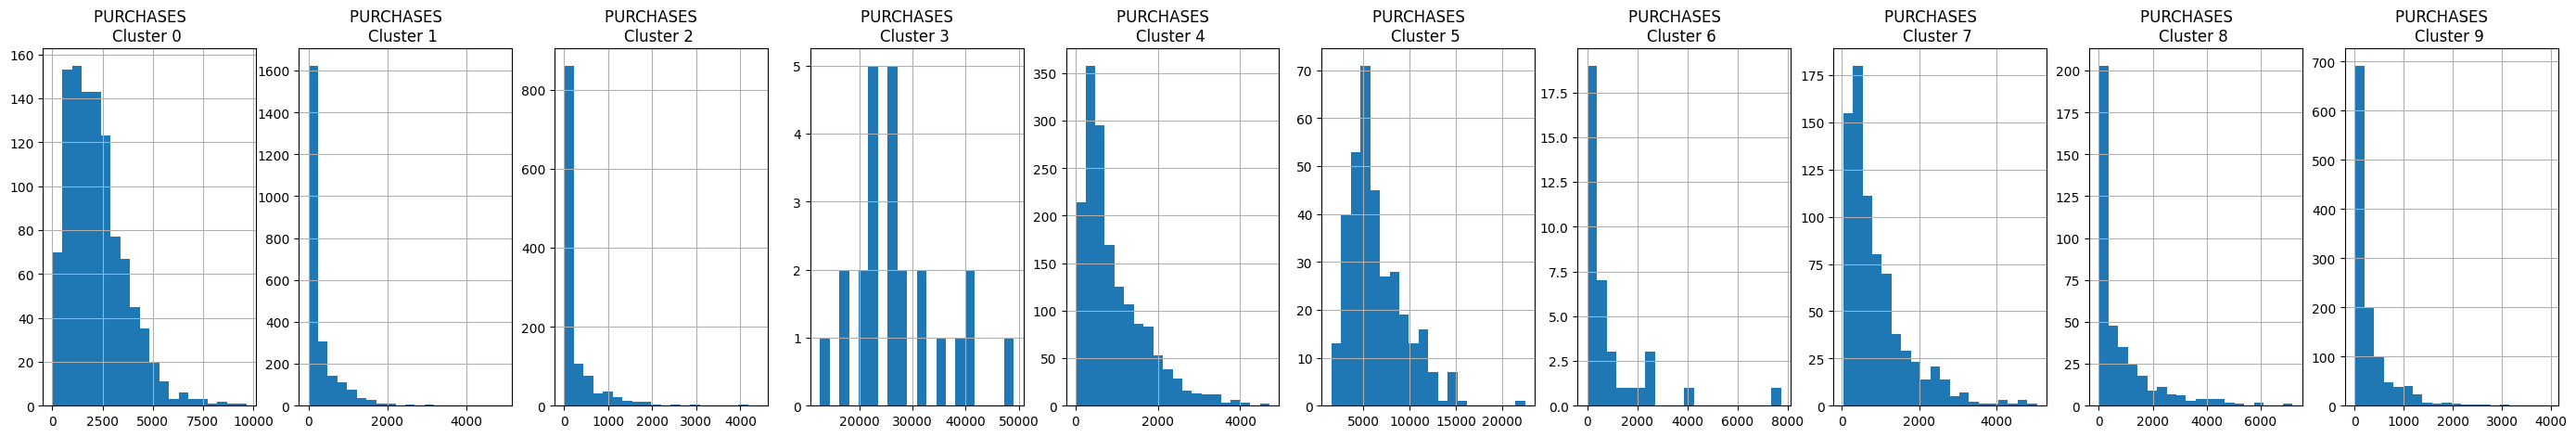

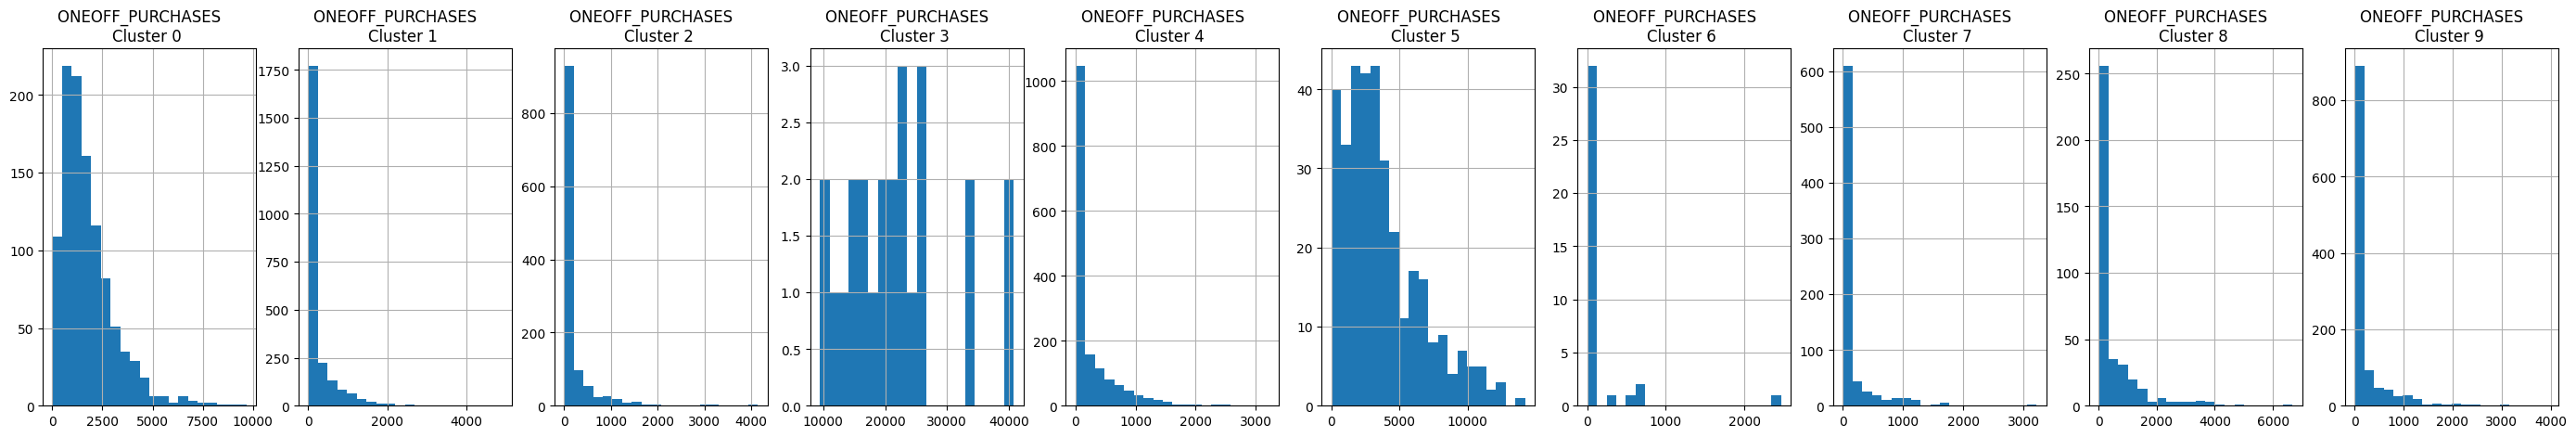

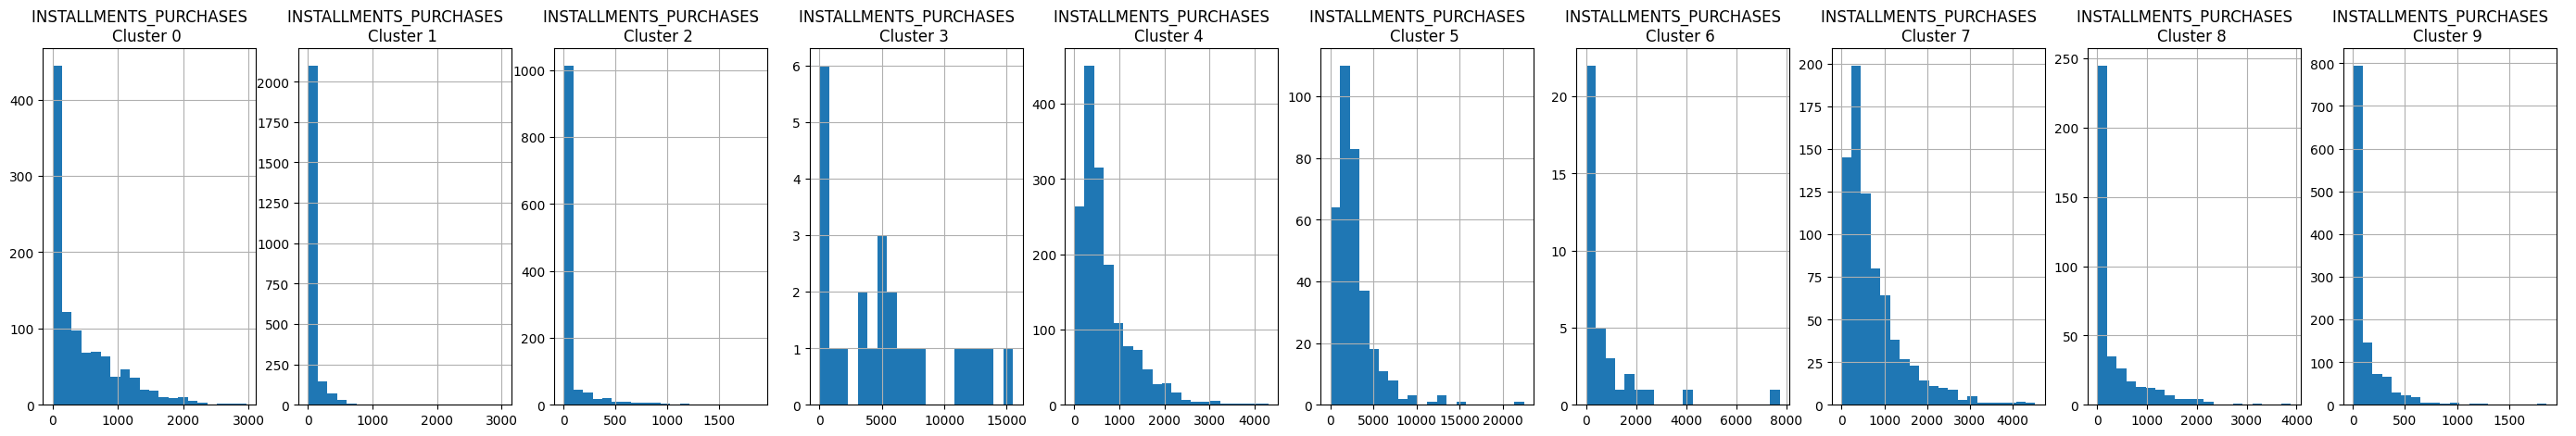

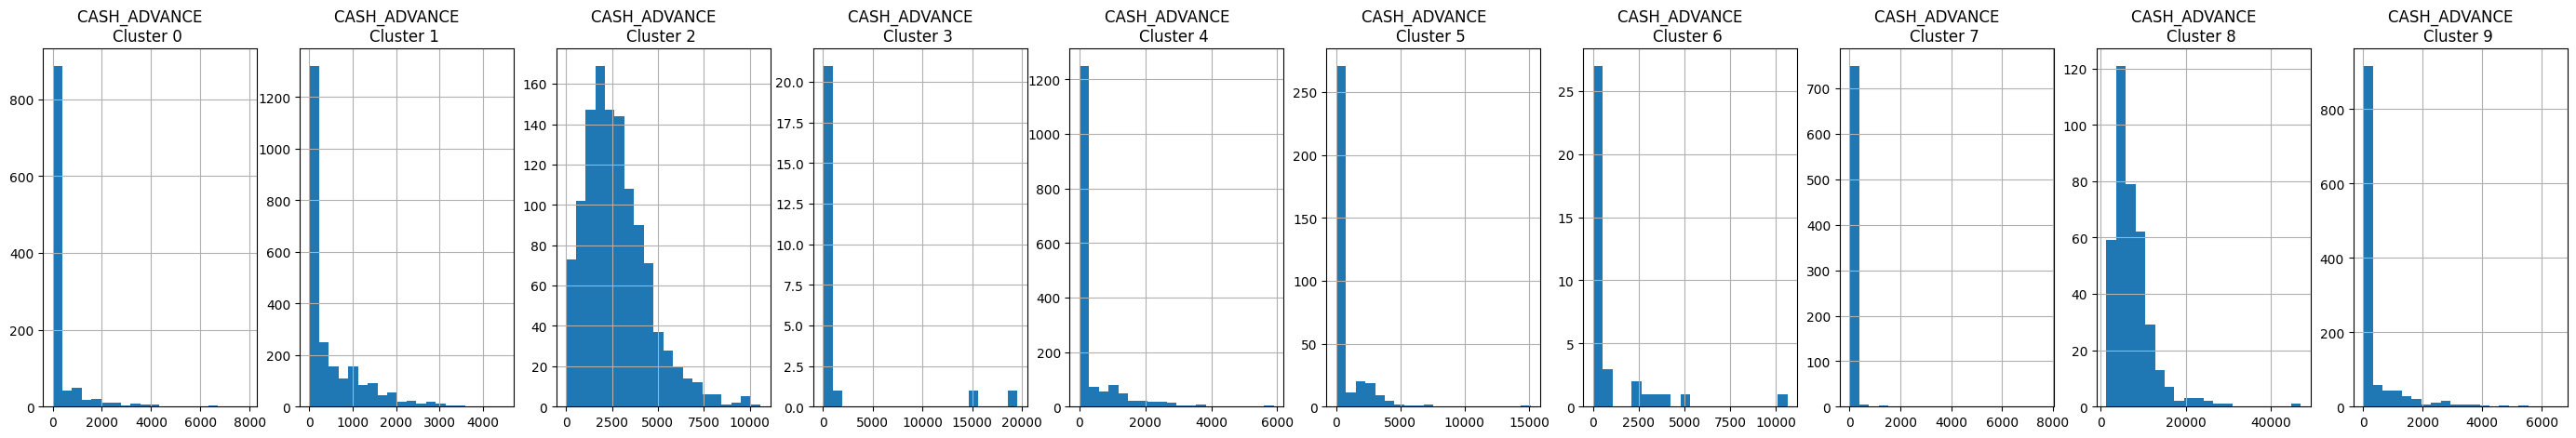

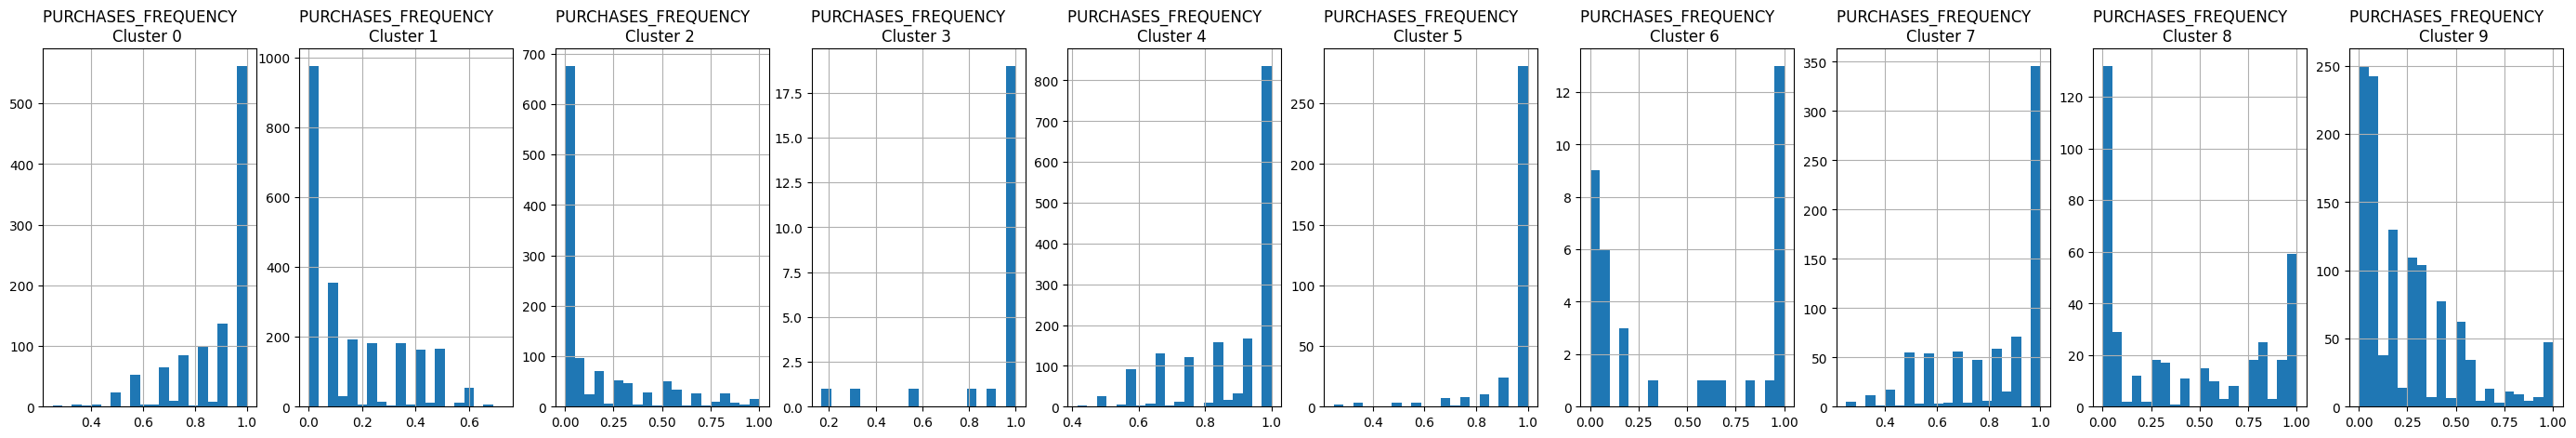

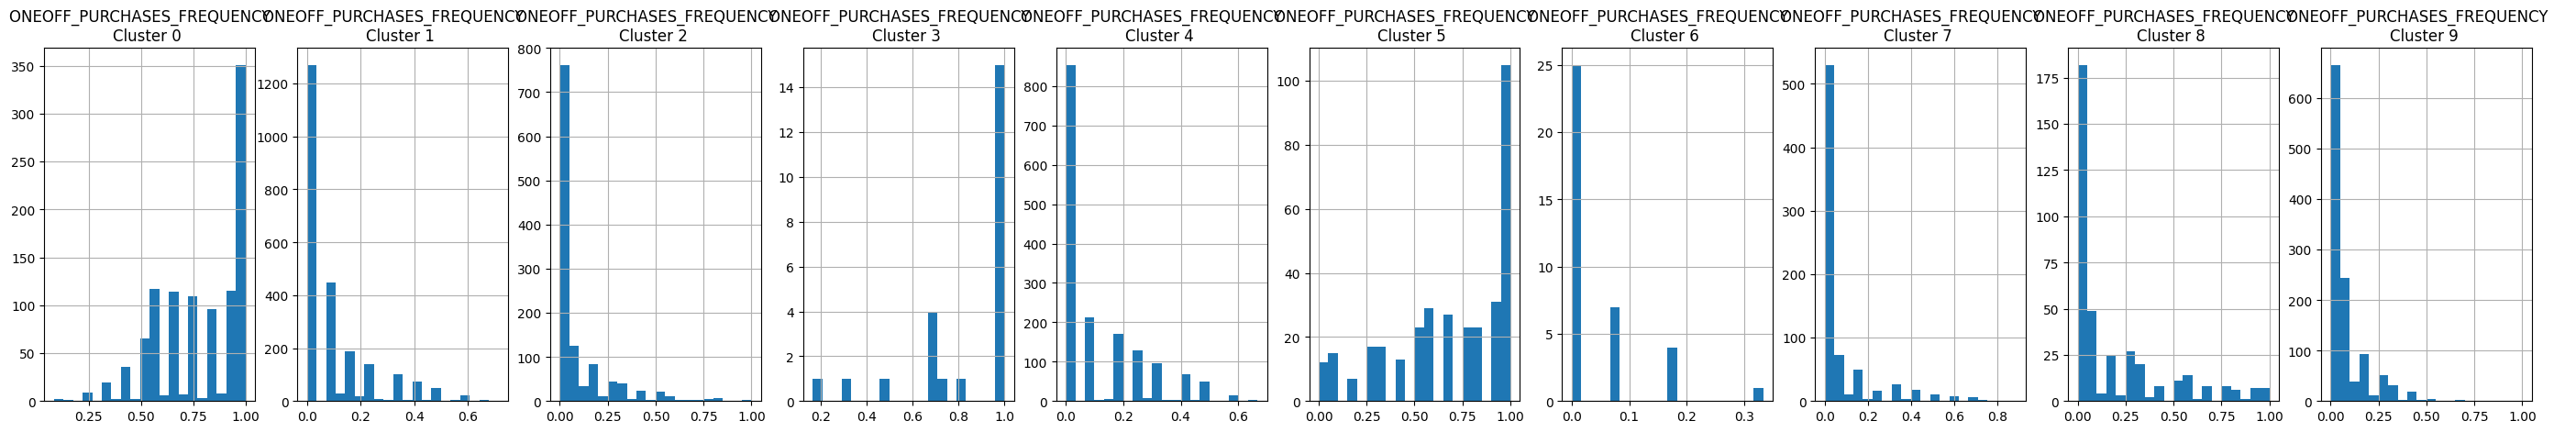

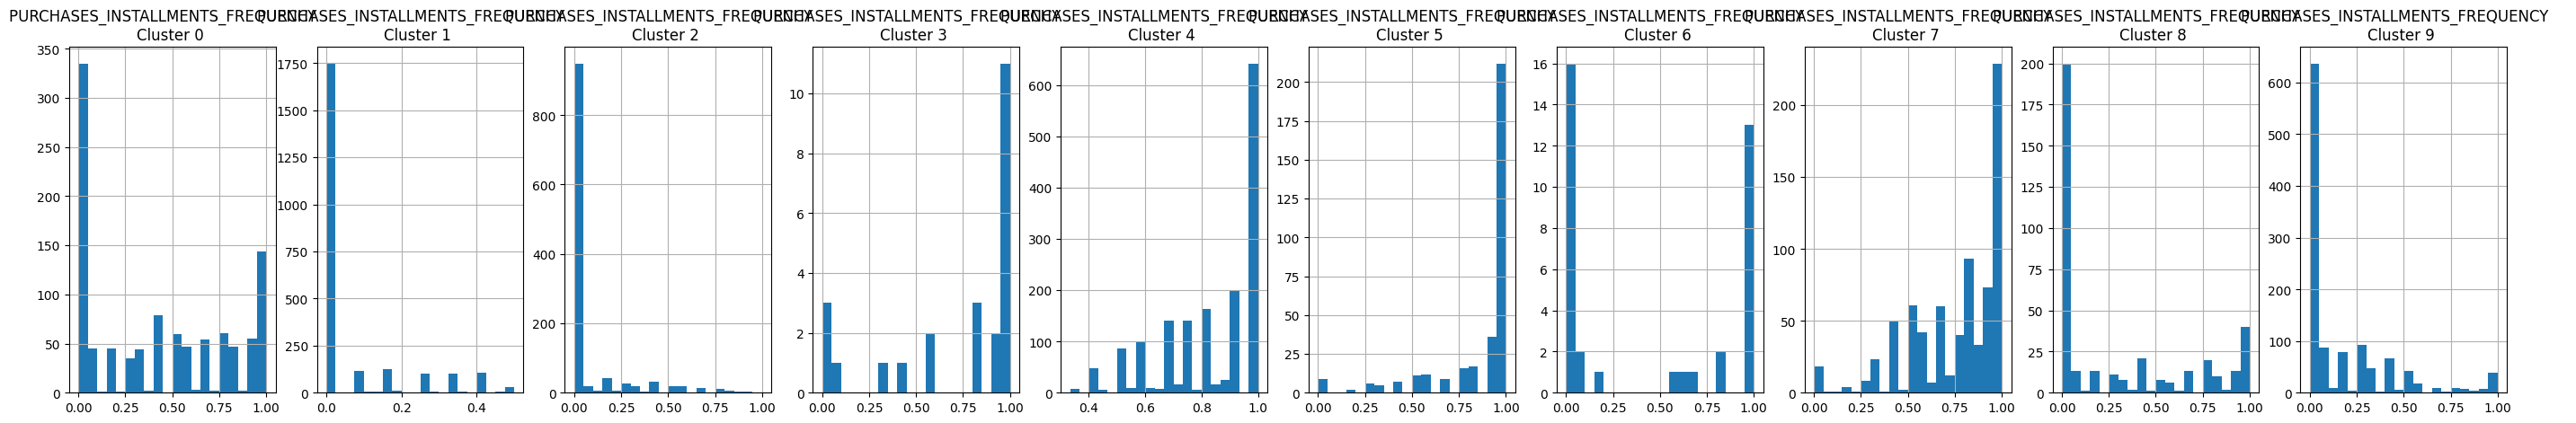

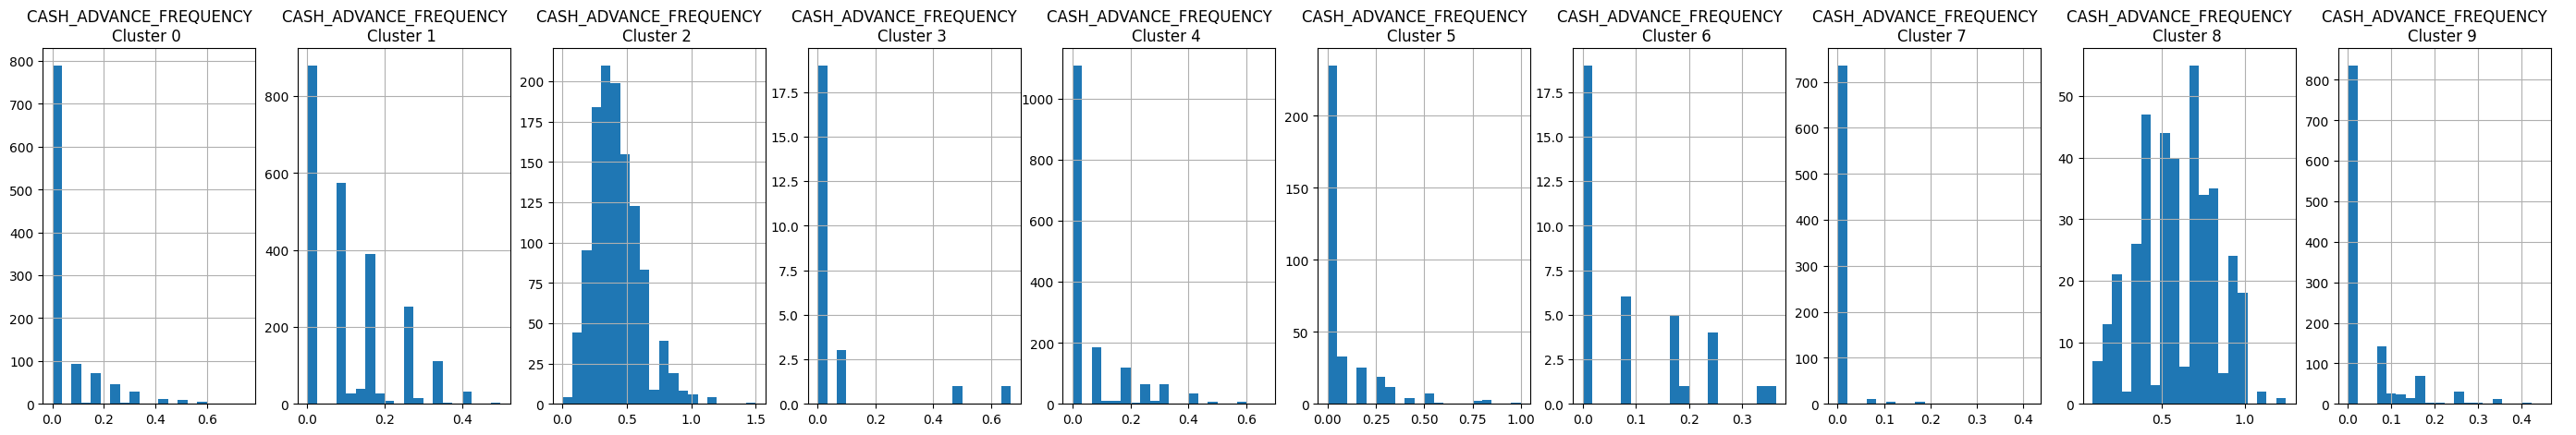

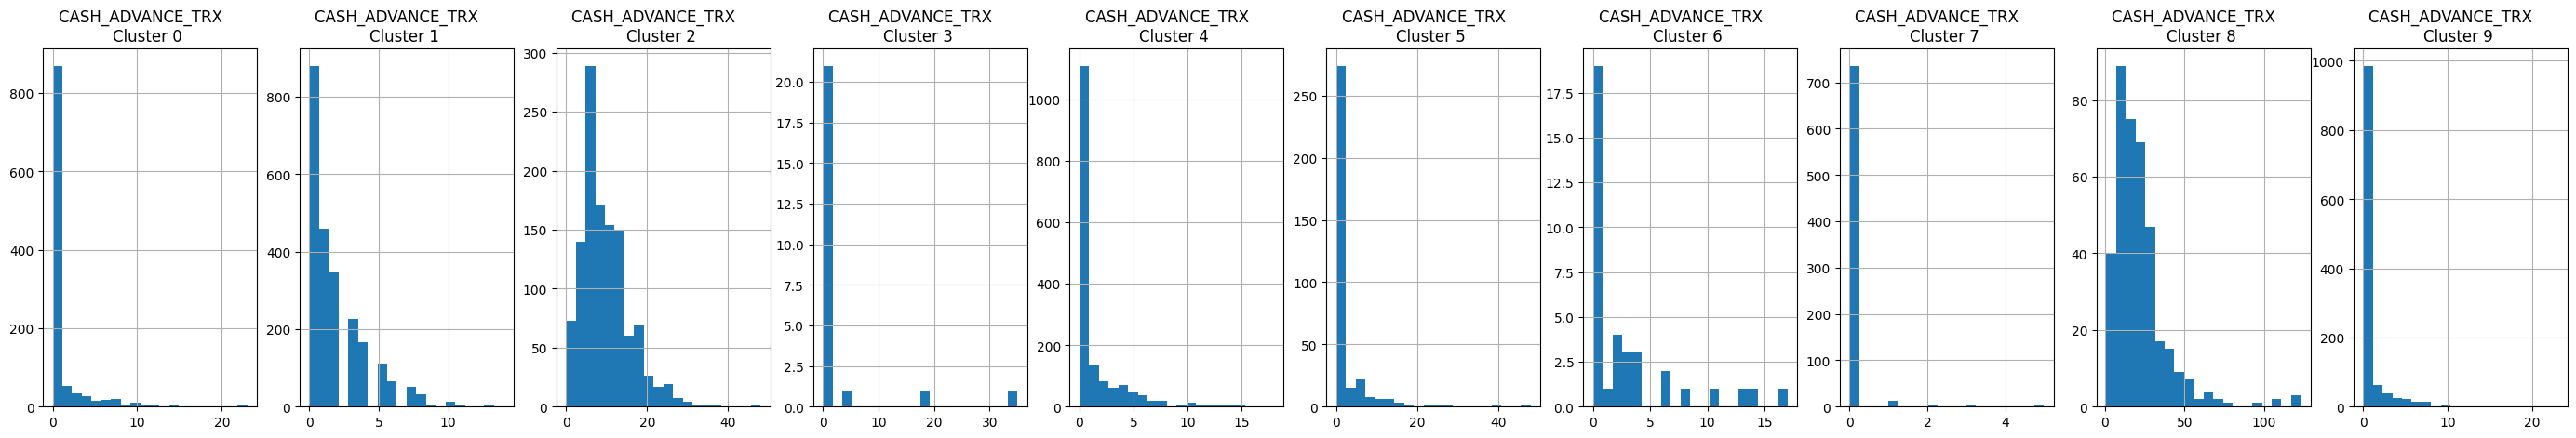

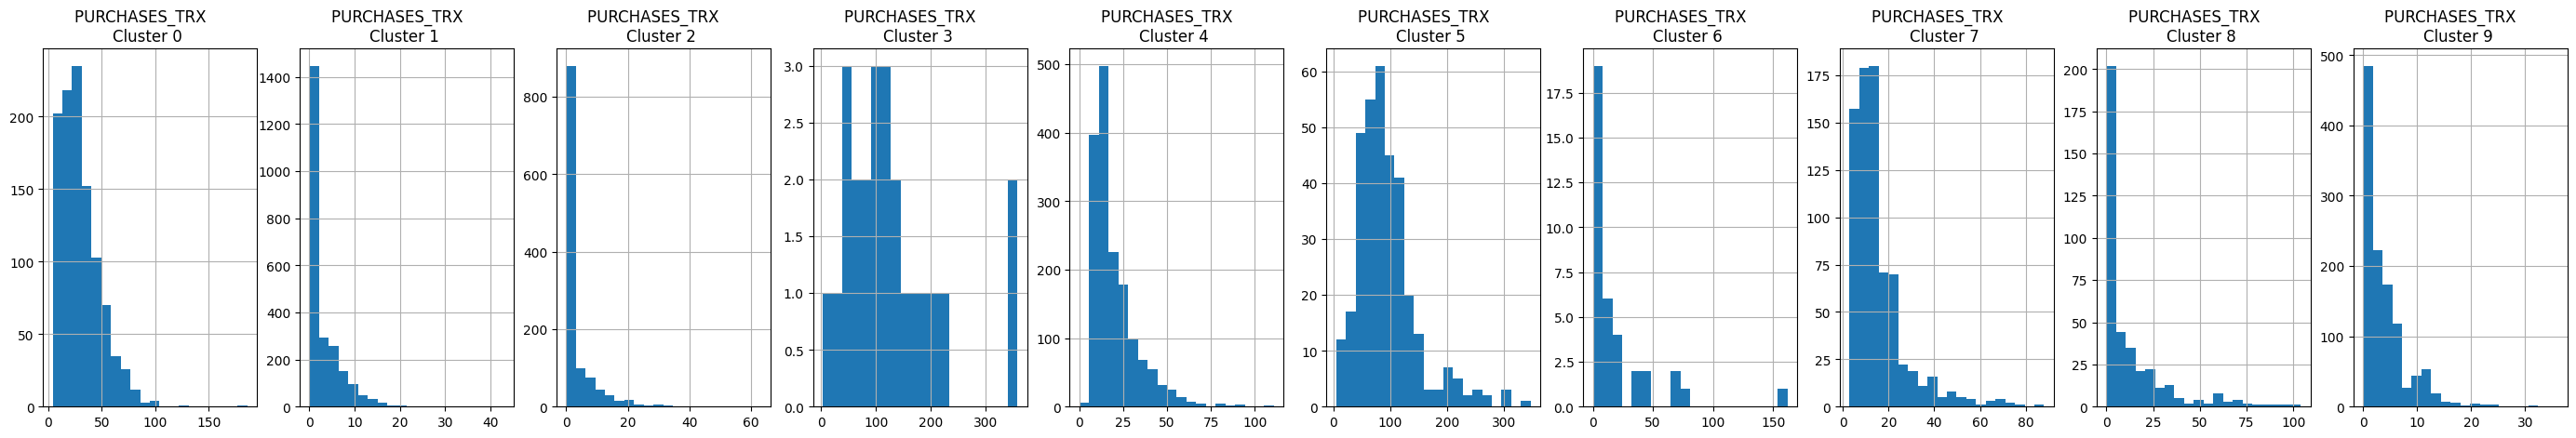

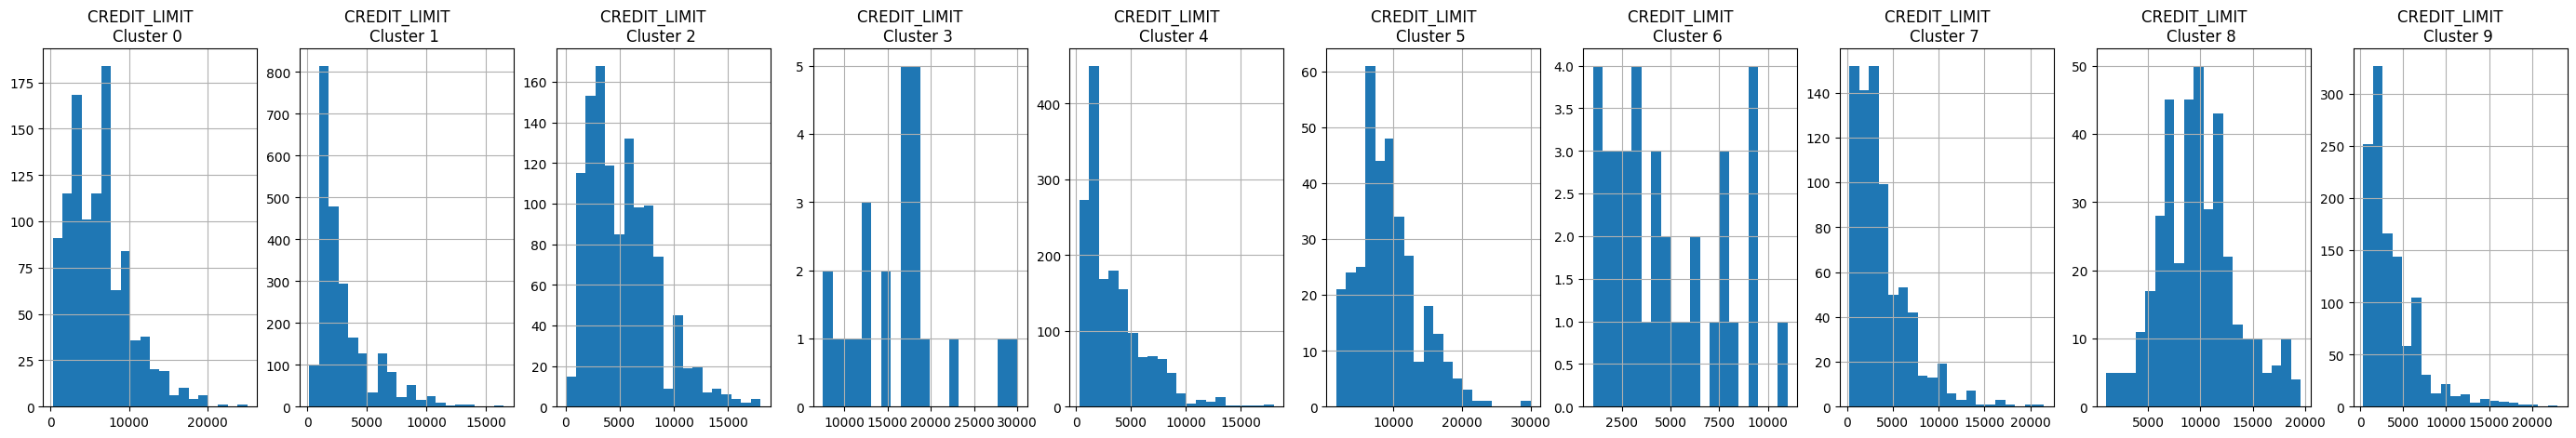

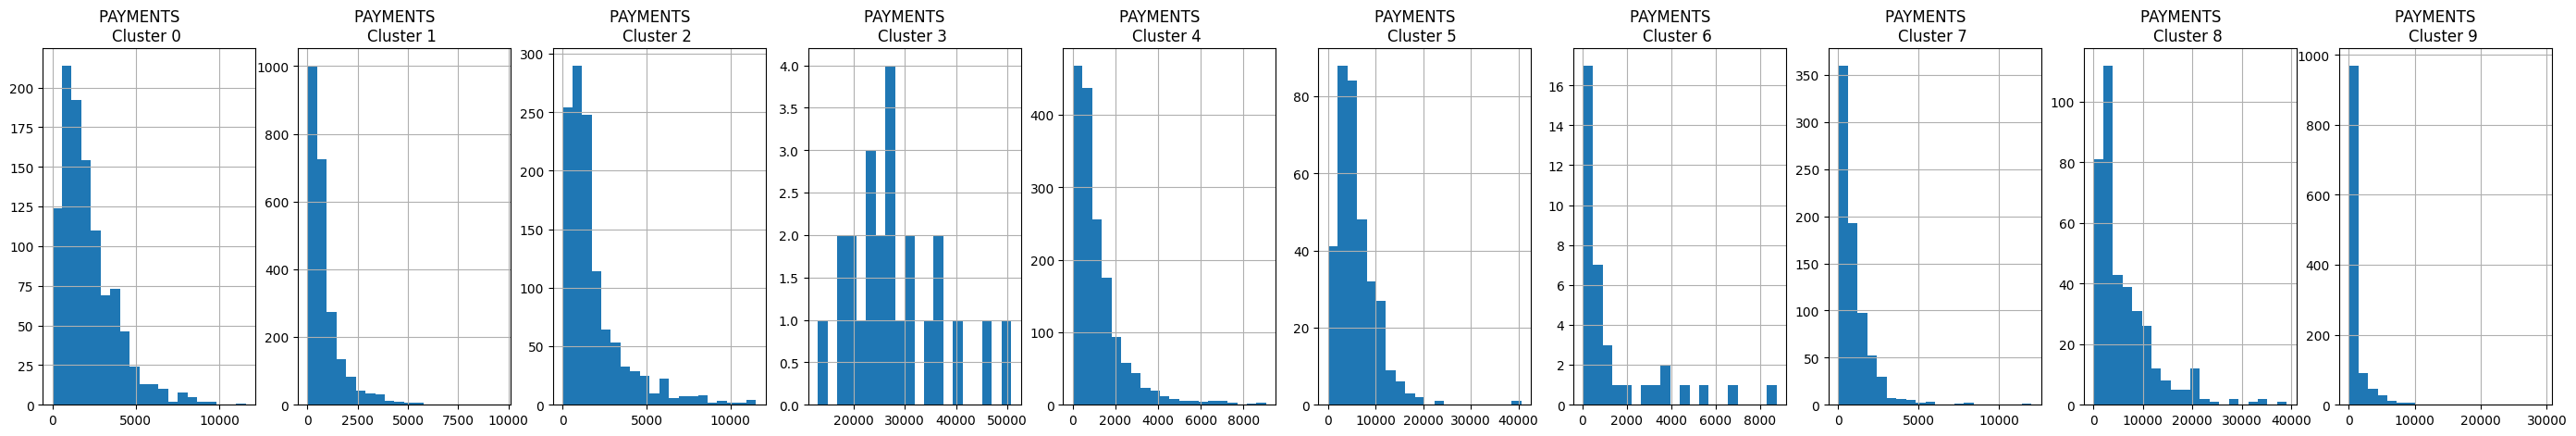

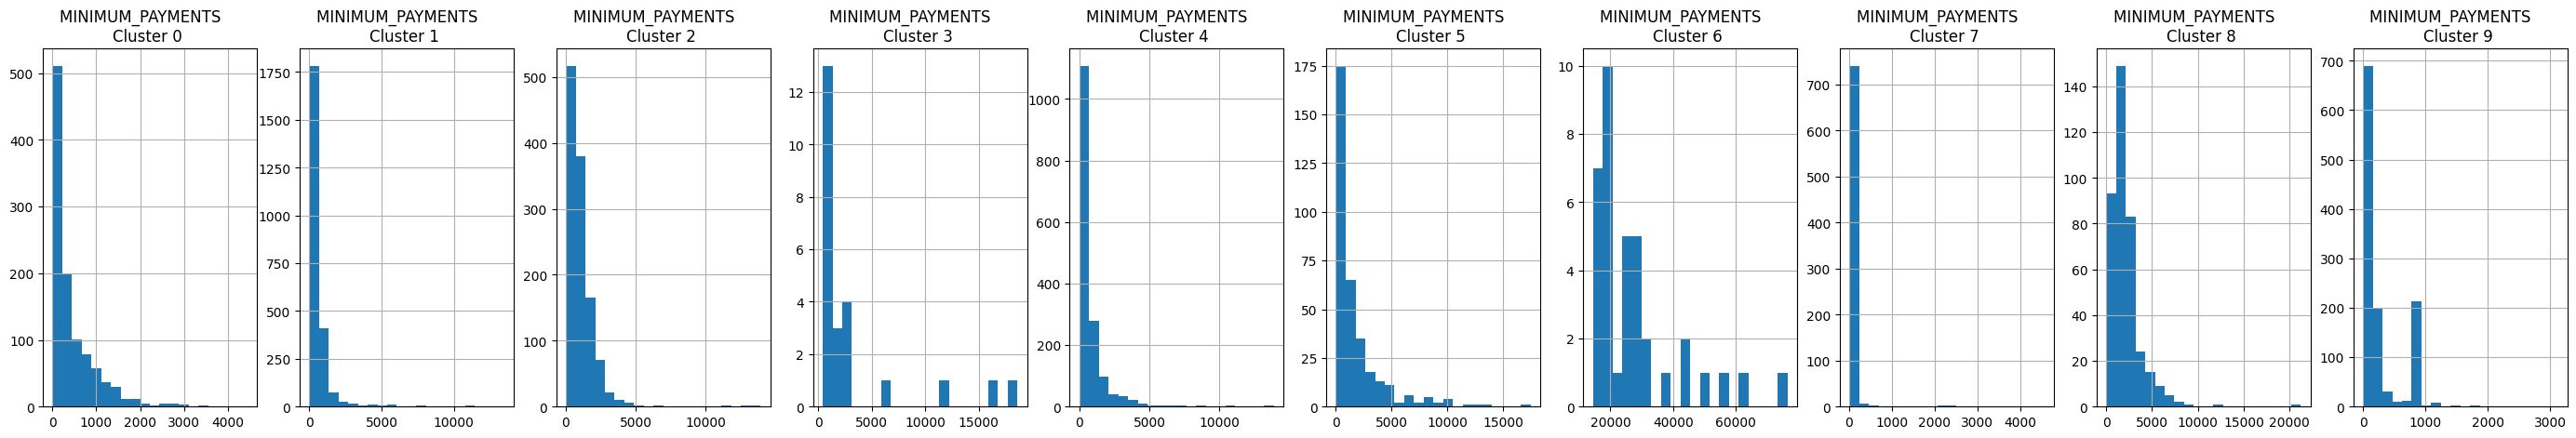

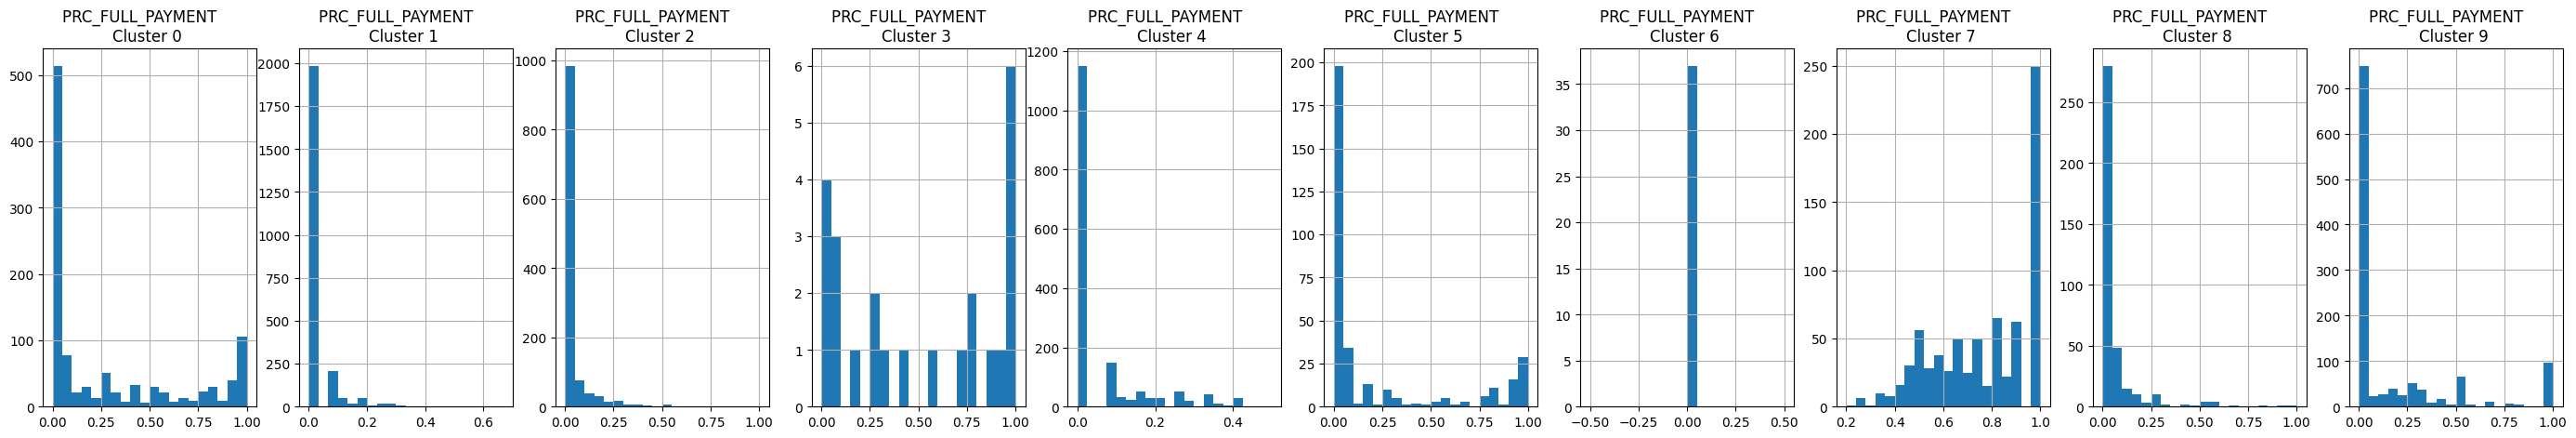

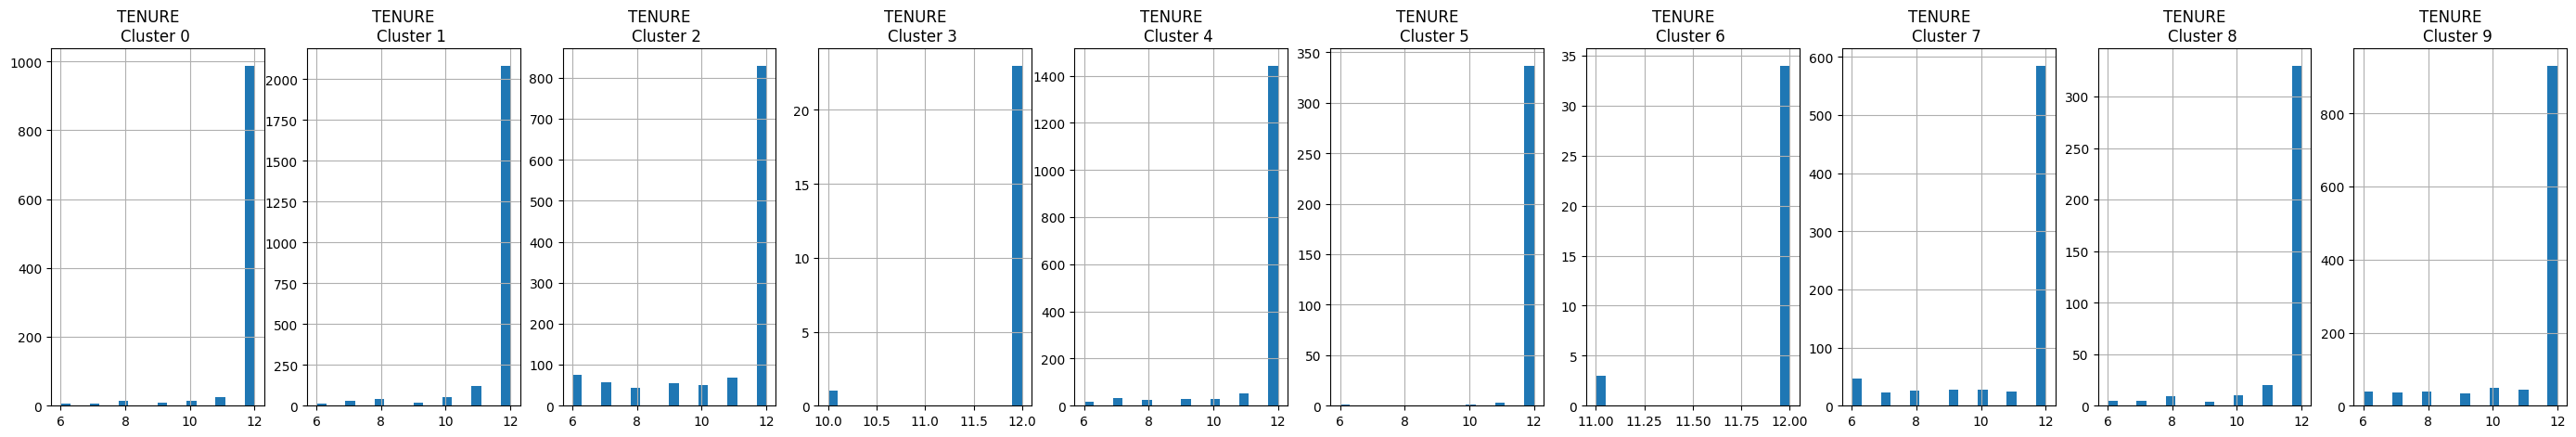

In [222]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(10):
    plt.subplot(1,10,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



# PCA

In [223]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
print(principal_comp)

[[-1.68222026 -1.07645061]
 [-1.1382949   2.50647666]
 [ 0.96968401 -0.3835203 ]
 ...
 [-0.92620364 -1.8107856 ]
 [-2.33655167 -0.65796601]
 [-0.55642216 -0.40046712]]


In [224]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2', ])
pca_df

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581
...,...,...
8945,-0.359629,-2.016145
8946,-0.564369,-1.639123
8947,-0.926204,-1.810786
8948,-2.336552,-0.657966


In [225]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,1
1,-1.138295,2.506477,2
2,0.969684,-0.383520,0
3,-0.873628,0.043166,1
4,-1.599434,-0.688581,1


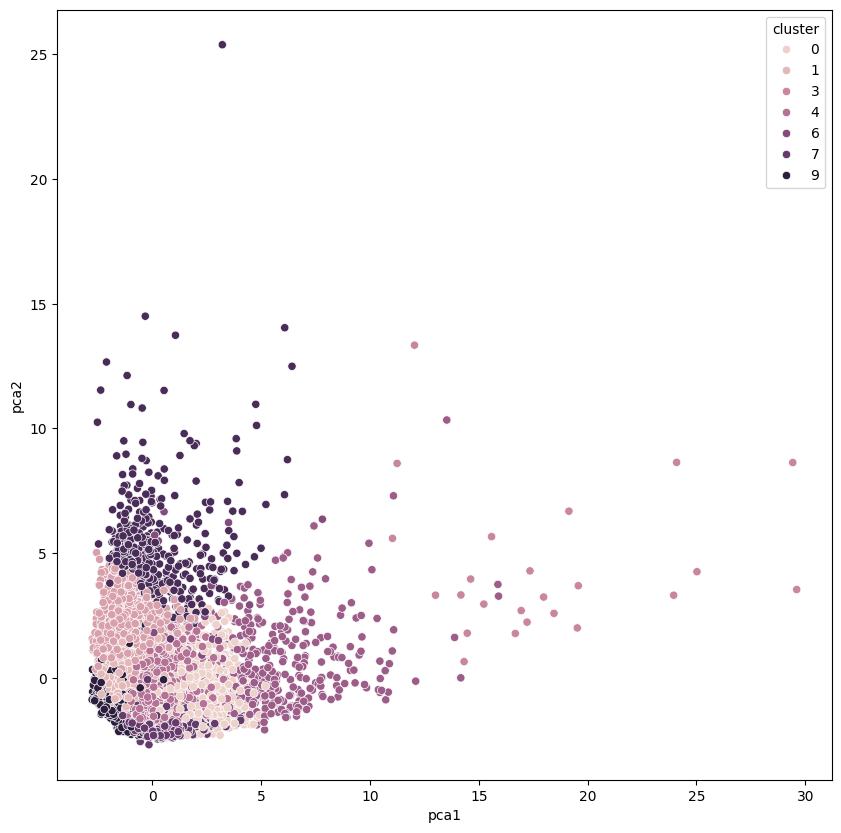

In [226]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue='cluster', data=pca_df,)

In [227]:
print(pca.explained_variance_ratio_)

[0.27290037 0.20301991]


# Using Autoencoder

In [234]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [235]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # df = твої дані


In [244]:
input_df = Input(shape = (17,))
x = Dense(7, activation='relu')(input_df)
x = Dense(32, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(16, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(16, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(32, activation='relu', kernel_initializer='glorot_uniform')(x)


decoded = Dense(17, kernel_initializer='glorot_uniform')(x)


# Autoencoder
autoencoder = Model(input_df, decoded)

# Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [245]:
autoencoder.fit(df_scaled, df_scaled, batch_size = 128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7596
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.5026
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.4820
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7056
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.7411
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.2064
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 14.2370
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.5076
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 16.4978
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 12.1788
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3061
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 29.1409
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 61.8868
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 30.6812
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 144.3

Epoch 1/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.6378
Epoch 2/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3871
Epoch 3/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.7605
Epoch 4/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3.8081
Epoch 5/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 1.1455
Epoch 6/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 1.7772
Epoch 7/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3.8973
Epoch 8/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 8.7340
Epoch 9/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 8.3278
Epoch 10/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 10.3043
Epoch 11/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 15.2419
Epoch 12/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 19.4339
Epoch 13/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 26.2992
Epoch 14/25
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 26.6370
Epoch 15/25
280/280 ━━━━━━━━━━━━━━━━━━

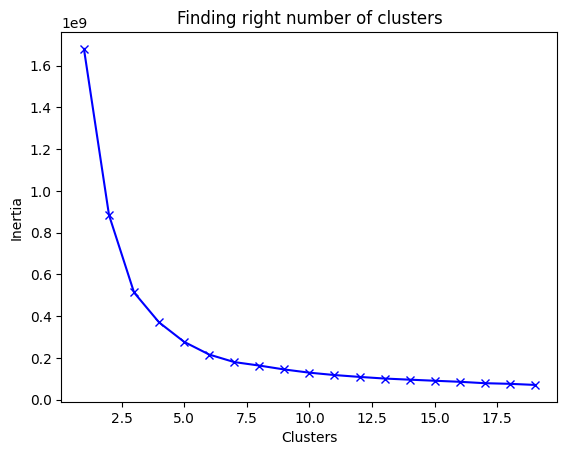

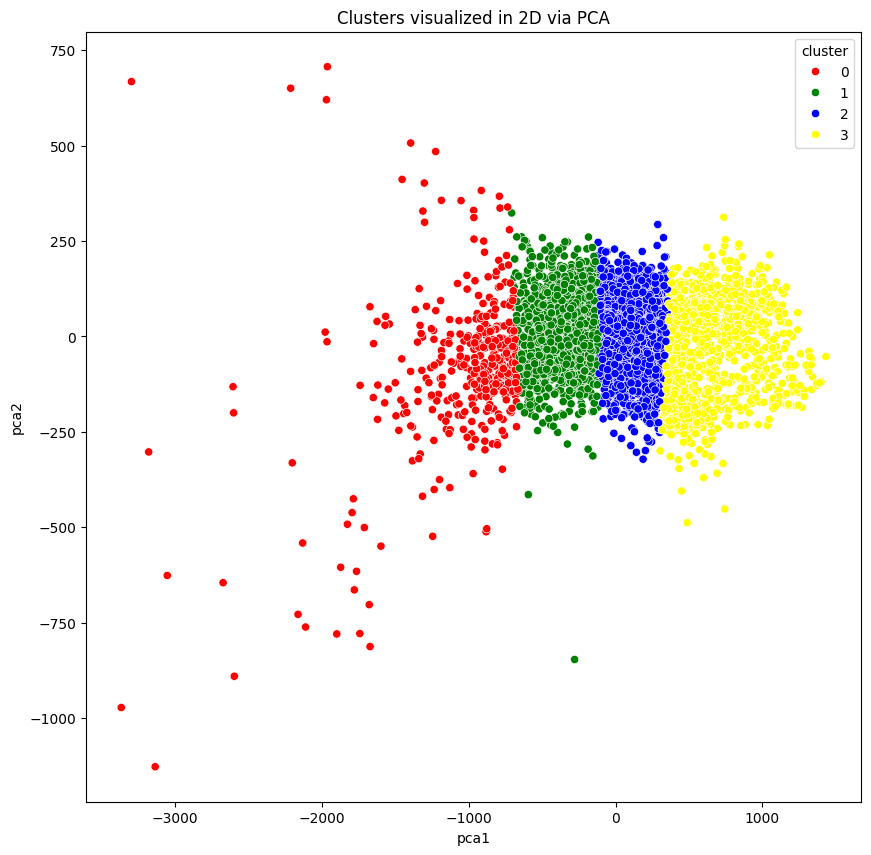

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform

# ---------------------------
# 1. Стандартизація даних
# ---------------------------
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  # df - твій DataFrame
print("Мін, макс:", df_scaled.min(), df_scaled.max())
print("Середнє, std:", df_scaled.mean(), df_scaled.std())

# ---------------------------
# 2. Autoencoder
# ---------------------------
input_dim = df_scaled.shape[1]  # 17
encoding_dim = 10               # bottleneck

input_df = Input(shape=(input_dim,))

# Encoder
x = Dense(32, activation='relu', kernel_initializer=glorot_uniform())(input_df)
x = Dense(16, activation='relu', kernel_initializer=glorot_uniform())(x)
encoded = Dense(encoding_dim, activation='relu', kernel_initializer=glorot_uniform())(x)

# Decoder
x = Dense(16, activation='relu', kernel_initializer=glorot_uniform())(encoded)
x = Dense(32, activation='relu', kernel_initializer=glorot_uniform())(x)
decoded = Dense(input_dim, kernel_initializer=glorot_uniform())(x)

# Моделі
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)

# Компіліруємо
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Тренування
autoencoder.fit(df_scaled, df_scaled, batch_size=32, epochs=25, verbose=1)

# Bottleneck output
pred = encoder.predict(df_scaled)

# ---------------------------
# 3. Кластеризація KMeans
# ---------------------------
scores_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

plt.plot(range_values, scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

# Кластери (наприклад 4)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(pred)
df_cluster_dr = pd.concat([df.reset_index(drop=True),
                           pd.DataFrame({'cluster': labels})], axis=1)

# ---------------------------
# 4. Візуалізація через PCA (2D)
# ---------------------------
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(prin_comp, columns=['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

plt.figure(figsize=(10, 10))
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df,
                palette=['red', 'green', 'blue', 'yellow'])
plt.title("Clusters visualized in 2D via PCA")
plt.show()
